In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px


Description of Data Experiment
-------------------------

The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING\_UPSTAIRS, WALKING\_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

**The data is well normalized** [-1,1]

### Data Analysis and Feature Engineering

#### 1\. **Initial Data Analysis**

In the data analysis phase, we conducted several key checks to understand the structure and integrity of the dataset:

*   **Missing Values**: We inspected the dataset for any missing or null values across the features and ensured that the data is complete for modeling. The absence of missing data is essential for training machine learning models effectively, as missing values can cause errors or misinterpretation of results.
    
*   **Target Variable Balance**: The distribution of the target variable, Activity, was checked for balance. A balanced target ensures that the model does not become biased toward the more frequent classes. In this case, the dataset was found to be balanced, which is favorable for building robust classifiers.
    
*   **Data Types**: We ensured that each feature is of the correct data type (e.g., numerical features for continuous variables and categorical for the target). Correct data types allow efficient and accurate processing and modeling.
    

#### 2\. **Feature Engineering**

Based on the exploratory data analysis (EDA), various feature engineering techniques were applied to enhance the dataset for better model performance. Here are the new features added to the DataFrame:

*   ```python
df\['is\_static\_gyro\_entropy'\] = df\['fBodyGyro-entropy()-Z'\].apply(lambda x: 1 if x > 0 else 0)
    ```
    
    *   **How it helps modeling**: This feature acts as a binary indicator for static activities, allowing the model to focus on distinguishing these from dynamic activities. This could improve classification accuracy, especially for models that are sensitive to activity transitions.
        
*   ```python
df\['is\_static\_entropy'\] = df\['fBodyAccJerk-entropy()-X'\].apply(lambda x: 1 if x > 0 else 0)
    ```    
    *   **How it helps modeling**: Similar to the previous feature, this binary indicator adds another layer of static activity detection, helping the model better separate static from dynamic activities, leading to better model performance.
        
*   ```python
df\['is\_walking\_downstairs\_energy'\] = df\['fBodyAcc-bandsEnergy()-1,8'\].apply(lambda x: 1 if x > 0 else 0)
    ```
    
    *   **How it helps modeling**: By flagging walking downstairs activities, this feature enables the model to focus on this specific activity, improving its classification capabilities for similar types of activities.
        
*  ```python
df\['is\_laying\_energy'\] = df\['tGravityAcc-energy()-Y'\].apply(lambda x: 1 if x > 0 else 0)
   ```
    
    *   **How it helps modeling**: This binary feature highlights laying activities and helps the model distinguish them from others. It can boost accuracy in predicting activities related to body positioning.
        
*   ```python
df\['is\_laying'\] = df\['angle(X,gravityMean)'\].apply(lambda x: 1 if x > 0.01 else 0)
   ```
    
    *   **How it helps modeling**: This feature provides a simple yet powerful indicator of laying activities, helping the model classify these instances more effectively.
        
*   ```python
df\['is\_walking\_downstairs'\] = df\['tBodyAccMag-mean()'\].apply(lambda x: 1 if x > 0.02 else 0)
    ```
    
    *   **How it helps modeling**: This binary feature enables the model to specifically recognize walking downstairs, reducing the likelihood of misclassifying it as another activity.
        
*   pythonCopier le codedf\['is\_dynamic'\] = df\['tBodyAccMag-mean()'\].apply(lambda x: 1 if x > -0.6 else 0)
    
    *   **How it helps modeling**: This feature helps distinguish dynamic activities from static ones, guiding the model to treat dynamic and static activities differently, improving overall classification performance.
        

#### 3\. **How the Feature Engineering Helps Modeling**

The addition of these engineered features enhances the dataset in several ways:

*   **Improved Separation of Activity Types**: By creating binary indicators for specific activities (e.g., walking downstairs, laying down), the model can more easily separate and identify these activities during classification.
    
*   **Better Focus on Relevant Signals**: Features like entropy, energy, and angles help highlight the most relevant signals that distinguish between different activities. These features capture underlying patterns that a model can leverage to make more accurate predictions.
    
*   **Reduction in Complexity**: By reducing the problem space (e.g., using is\_static\_gyro\_entropy to flag static activities), the model doesn't need to learn complex decision boundaries for every possible scenario. Instead, it can focus on distinguishing between broad activity types (e.g., dynamic vs. static).
    
*   **Enhanced Interpretability**: These engineered features improve the interpretability of the model, as it is easier to understand why a certain activity is being classified based on these binary flags.
    

In summary, the feature engineering steps provide valuable new features that will help the model achieve higher accuracy and faster convergence during training by focusing on key aspects of the activity data.

In [ ]:
df=pd.read_csv('/content/train.csv')


In [ ]:
df.shape

(7352, 563)

In [ ]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [ ]:
df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [ ]:
df.isnull().values.sum()


0



1. we have 0 duplicates values
2. we have 0 null values
3. we have out layers

In [ ]:
df.dtypes

,0
tBodyAcc-mean()-X,float64
tBodyAcc-mean()-Y,float64
tBodyAcc-mean()-Z,float64
tBodyAcc-std()-X,float64
tBodyAcc-std()-Y,float64
...,...
"angle(X,gravityMean)",float64
"angle(Y,gravityMean)",float64
"angle(Z,gravityMean)",float64
subject,int64


In [ ]:
# Filter columns with object data type
object_columns = df.select_dtypes(include=['object'])

# Display the columns with object data type
print("Object Columns:")
print(object_columns.columns)


Object Columns:
Index(['Activity'], dtype='object')


In [ ]:
df['Activity'].groupby(df['Activity']).count()

,Activity
Activity,
LAYING,1407
SITTING,1286
STANDING,1374
WALKING,1226
WALKING_DOWNSTAIRS,986
WALKING_UPSTAIRS,1073


In [ ]:
df['subject'].value_counts()

,count
subject,
25,409
21,408
26,392
30,383
28,382
27,376
23,372
17,368
16,366


In [ ]:
fig = px.histogram(data_frame=df, x="subject", facet_col="Activity",
                   title="Activity Distribution by Subject (Faceted by Activity)",
                   labels={"subject": "Subject", "Activity": "Activity"})
fig.update_layout(xaxis_title="Subject", yaxis_title="Count")
fig.show()


The dataset shows that the number of samples from each subject is nearly equal, indicating no significant variation between subjects. Therefore, this does not pose a concern for the analysis.

In [ ]:
# Prepare data for the bar chart
activity_counts = df['Activity'].value_counts().reset_index()
activity_counts.columns = ['Activity', 'Count']  # Rename columns for clarity

# Create the bar chart
fig = px.bar(activity_counts,
             x='Activity', y='Count',
             color='Activity', title='Activity Distribution (Bar Chart)',
             labels={'Activity': 'Activity', 'Count': 'Count'},
             text='Count', width=1200)
fig.update_layout(xaxis_title='Activity', yaxis_title='Count')
fig.show()


In [ ]:
fig = px.box(df, y='subject', x="Activity", color="Activity", width=1200,
             boxmode="overlay", points="all",
             title="Distribution of Subjects Across Activities")
fig.update_layout(xaxis_title="Activity", yaxis_title="Subject ID")
fig.show()


**Data is balanced approximately**

We want to focus on features selected for this data , the most are from the accelerometer and gyroscope 3-axial raw signals

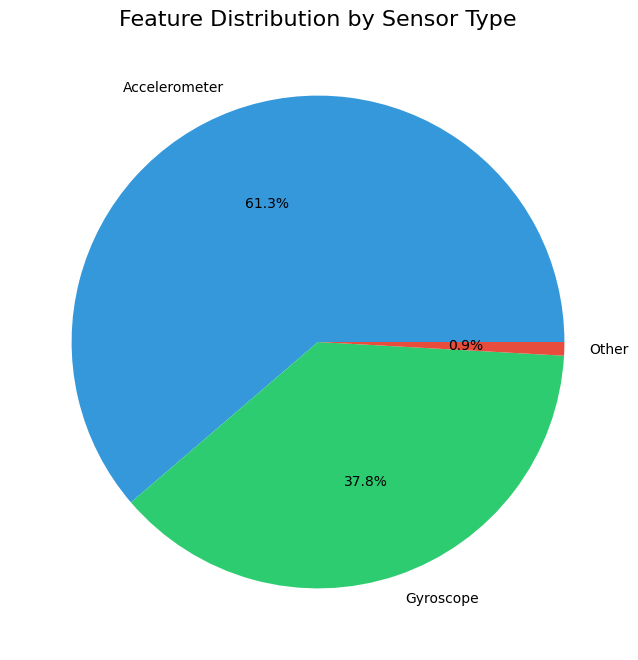

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Feature categorization
Acc, Gyro, other = 0, 0, 0

for col in df.columns:
    if 'Acc' in col:
        Acc += 1
    elif 'Gyro' in col:
        Gyro += 1
    else:
        other += 1

# Plotly Bar Chart
fig = px.bar(
    x=['Accelerometer', 'Gyroscope', 'Other'],
    y=[Acc, Gyro, other],
    color=['Accelerometer', 'Gyroscope', 'Other'],
    color_discrete_map={
        'Accelerometer': 'blue', 'Gyroscope': 'green', 'Other': 'red'
    },
    labels={'x': 'Sensor Type', 'y': 'Feature Count'},
    title="Feature Distribution by Sensor Type",
)
fig.show()


data = pd.DataFrame({
    'Sensor Type': ['Accelerometer', 'Gyroscope', 'Other'],
    'Count': [Acc, Gyro, other]
})

plt.figure(figsize=(8, 8))
colors = ['#3498db', '#2ecc71', '#e74c3c']
plt.pie(data['Count'], labels=data['Sensor Type'], colors=colors, autopct='%1.1f%%')
plt.title('Feature Distribution by Sensor Type', fontsize=16)
plt.show()


Acc=345,Geyro=213 ,other=5


Most data are by accelerometer information.By analyzing the probability density function (PDF) of the some Acc features chosen after some researches, you can identify thresholds that effectively separate static from dynamic activities.


Using this feature in combination with a threshold value (e.g., tBodyAccMag-mean() <= -0.5 for static or tBodyAccMag-mean() > -0.6 for dynamic) will help in creating a more accurate classification of activities.*

# **Feature Extraction**

## from tBodyAccMag-mean

In [ ]:
import plotly.express as px

# Plotly Histogram
fig = px.histogram(
    data_frame=df,
    x='tBodyAccMag-mean()',
    color='Activity',
    histnorm='probability density',
    barmode='overlay',
    title='Probability Density of tBodyAccMag-mean() by Activity',
    labels={'tBodyAccMag-mean()': 'Mean Magnitude of Body Acceleration', 'Activity': 'Activity Type'},
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig.update_layout(template='plotly_white')
fig.show()


```
if(tBodyAccMag-mean()<=-0.5):
    Activity = "static"
else:
    Activity = "dynamic"
```


In [ ]:
fig = px.box(
    df,
    y='tBodyAccMag-mean()',
    x='Activity',
    color='Activity',
    width=1200,
    boxmode='overlay',
    title='Distribution of tBodyAccMag-mean() Across Activities',
    labels={'tBodyAccMag-mean()': 'Mean Magnitude of Body Acceleration', 'Activity': 'Activity Type'},
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig.update_layout(template='plotly_white')
fig.show()


Using boxplot again we can come with more conditions to seperate static activities from dynamic activities.

```
if(tBodyAccMag-mean()<=-0.8):
    Activity = "static"
if(tBodyAccMag-mean()>=-0.6):
    Activity = "dynamic"
```

Also, we can easily seperate WALKING_DOWNSTAIRS activity from others using boxplot.

```
if(tBodyAccMag-mean()>0.02):
    Activity = "WALKING_DOWNSTAIRS"
else:
    Activity = "others"
```

But since 25% of WALKING_DOWNSTAIRS observations are below 0.02 which are misclassified as **others** so this condition makes an error of 25% in classification. "i will not use it"

## from angle(X,gravityMean)

In [ ]:
import plotly.express as px

fig = px.box(
    df,
    y='angle(X,gravityMean)',
    x='Activity',
    color='Activity',
    width=1200,
    boxmode='overlay',
    title='Distribution of angle(X,gravityMean) Across Activities',
    labels={'angle(X,gravityMean)': 'Angle Between X-axis and Gravity Mean', 'Activity': 'Activity Type'},
    color_discrete_sequence=px.colors.qualitative.Pastel
)
fig.update_layout(template='plotly_white')
fig.show()


In [ ]:
import plotly.express as px

fig = px.bar(
    df,
    x='angle(X,gravityMean)',
    y='Activity',
    color='Activity',
    width=1200,
    orientation='h',
    barmode='overlay',
    title='Distribution of angle(X,gravityMean) Across Activities',
    labels={'angle(X,gravityMean)': 'Angle Between X-axis and Gravity Mean', 'Activity': 'Activity Type'},
    color_discrete_sequence=px.colors.qualitative.Safe
)
fig.update_layout(template='plotly_white')
fig.show()


From the boxplot and bar we can observe that angle(X,gravityMean) perfectly seperates LAYING from other activities.
```
if(angle(X,gravityMean)>0.01):
    Activity = "LAYING"
else:
    Activity = "others"
```

## from 'angle(Y,gravityMean)'

In [ ]:
import plotly.express as px

fig = px.box(
    df,
    y='angle(Y,gravityMean)',
    x='Activity',
    color='Activity',
    width=1200,
    boxmode='overlay',
    title='Distribution of angle(Y,gravityMean) Across Activities',
    labels={
        'angle(Y,gravityMean)': 'Angle Between Y-axis and Gravity Mean',
        'Activity': 'Activity Type'
    },
    color_discrete_sequence=px.colors.qualitative.Bold
)
fig.update_layout(template='plotly_white')
fig.show()


## from tGravityAcc-energy()-Y

In [ ]:
fig = px.box(df, y='tGravityAcc-energy()-Y', x="Activity",color="Activity",width=1200,boxmode="overlay")
fig.show()


From the boxplot and bar we can observe that (tGravityAcc-energy()-Y) perfectly seperates LAYING from other activities.
```
if(tGravityAcc-energy()-Y)>0):
    Activity = "LAYING"
else:
    Activity = "others"
```
` energy(): Energy measure. Sum of the squares divided by the number of values. `

## from fBodyAcc-bandsEnergy()-1,8

In [ ]:
import plotly.express as px

fig = px.box(
    df,
    y='fBodyAcc-bandsEnergy()-1,8',
    x='Activity',
    color='Activity',
    width=1200,
    boxmode='overlay',
    title='Distribution of fBodyAcc-bandsEnergy()-1,8 Across Activities',
    labels={
        'fBodyAcc-bandsEnergy()-1,8': 'Body Accelerometer Energy (1-8 Hz Band)',
        'Activity': 'Activity Type'
    },
    color_discrete_sequence=px.colors.qualitative.Vivid
)
fig.update_layout(template='plotly_white')
fig.show()


In [ ]:
import plotly.express as px

fig = px.bar(
    df,
    x='fBodyAcc-bandsEnergy()-1,8',
    y='Activity',
    color='Activity',
    width=1200,
    orientation='h',
    barmode='overlay',
    title='Distribution of fBodyAcc-bandsEnergy()-1,8 Across Activities',
    labels={
        'fBodyAcc-bandsEnergy()-1,8': 'Body Accelerometer Energy (1-8 Hz Band)',
        'Activity': 'Activity Type'
    },
    color_discrete_sequence=px.colors.qualitative.Set1
)
fig.update_layout(template='plotly_white')
fig.show()


From the boxplot and bar we can observe that (fBodyAcc-bandsEnergy()-1,8) perfectly seperates Walking_downstairs from other activities.
```
if(fBodyAcc-bandsEnergy()-1,8)>0):
    Activity = "Walking_downstairs"
else:
    Activity = "others"
```
`bandsEnergy(): Energy of a frequency interval within the 64 bins of the FFT of each window.`

## From fBodyAccJerk-entropy()-X

In [ ]:
import plotly.express as px

fig = px.box(
    df,
    y='fBodyAccJerk-entropy()-X',
    x='Activity',
    color='Activity',
    width=1200,
    boxmode='overlay',
    title='Distribution of fBodyAccJerk-entropy()-X Across Activities',
    labels={
        'fBodyAccJerk-entropy()-X': 'Body Acceleration Jerk Entropy (X-axis)',
        'Activity': 'Activity Type'
    },
    color_discrete_sequence=px.colors.qualitative.Bold
)
fig.update_layout(template='plotly_white')
fig.show()


In [ ]:
import plotly.express as px

fig = px.bar(
    df,
    x='fBodyAccJerk-entropy()-X',
    y='Activity',
    color='Activity',
    width=1200,
    orientation='h',
    barmode='overlay',
    title='Distribution of fBodyAccJerk-entropy()-X Across Activities',
    labels={
        'fBodyAccJerk-entropy()-X': 'Body Acceleration Jerk Entropy (X-axis)',
        'Activity': 'Activity Type'
    },
    color_discrete_sequence=px.colors.qualitative.D3
)
fig.update_layout(template='plotly_white')
fig.show()


```
if(fBodyAccJerk-entropy()-X>0):
    Activity = "static"
else:
    Activity = "dynmic"
```


## From fBodyGyro-entropy()-Z

In [ ]:
import plotly.express as px

fig = px.box(
    df,
    y='fBodyGyro-entropy()-Z',
    x='Activity',
    color='Activity',
    width=1200,
    boxmode='overlay',
    title='Distribution of fBodyGyro-entropy()-Z Across Activities',
    labels={
        'fBodyGyro-entropy()-Z': 'Gyroscope Entropy (Z-axis)',
        'Activity': 'Activity Type'
    },
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig.update_layout(template='plotly_white')
fig.show()


In [ ]:
import plotly.express as px

fig = px.bar(
    df,
    x='fBodyGyro-entropy()-Z',
    y='Activity',
    color='Activity',
    width=1200,
    orientation='h',
    barmode='overlay',
    title='Distribution of fBodyGyro-entropy()-Z Across Activities',
    labels={
        'fBodyGyro-entropy()-Z': 'Gyroscope Entropy (Z-axis)',
        'Activity': 'Activity Type'
    },
    color_discrete_sequence=px.colors.qualitative.Pastel
)
fig.update_layout(template='plotly_white')
fig.show()


## From tBodyAcc-max()-X

In [ ]:
import plotly.express as px

fig = px.box(
    df,
    y='tBodyAcc-max()-X',
    x='Activity',
    color='Activity',
    width=1200,
    boxmode='overlay',
    title='Distribution of tBodyAcc-max()-X Across Activities',
    labels={
        'tBodyAcc-max()-X': 'Max Acceleration (X-axis)',
        'Activity': 'Activity Type'
    },
    color_discrete_sequence=px.colors.qualitative.Set1
)
fig.update_layout(template='plotly_white')
fig.show()


```
df["is_static_tbody"]= df["tBodyAcc-max()-X"].apply(lambda x: 1 if x < 0.5 else 0)
```

In [ ]:
df["is_static_tbody"]= df["tBodyAcc-max()-X"].apply(lambda x: 1 if x < 0.5 else 0)
df['is_static_entropy'] = df['fBodyAccJerk-entropy()-X'].apply(lambda x: 1 if x > 0 else 0)
df['is_walking_downstairs_energy'] = df['fBodyAcc-bandsEnergy()-1,8'].apply(lambda x: 1 if x > 0 else 0)
df['is_laying_energy'] = df['tGravityAcc-energy()-Y'].apply(lambda x: 1 if x > 0 else 0)
df['is_laying'] = df['angle(X,gravityMean)'].apply(lambda x: 1 if x > 0.01 else 0)
df['is_dynamic'] = df['tBodyAccMag-mean()'].apply(lambda x: 1 if x > -0.6 else 0)


In [ ]:
df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity',
       'is_static_tbody', 'is_static_entropy', 'is_walking_downstairs_energy',
       'is_laying_energy', 'is_laying', 'is_dynamic'],
      dtype='object', length=569)

In [ ]:
# Get the current column order
current_columns = df.columns.tolist()

# Remove 'Activity' from the list and append it to the end
current_columns.remove('Activity')
current_columns.append('Activity')

# Reorder the DataFrame columns
df = df[current_columns]

# Verify the new column order
print(df.columns)


Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject',
       'is_static_tbody', 'is_static_entropy', 'is_walking_downstairs_energy',
       'is_laying_energy', 'is_laying', 'is_dynamic', 'Activity'],
      dtype='object', length=569)


In [ ]:
df["Activity"]

,Activity
0,STANDING
1,STANDING
2,STANDING
3,STANDING
4,STANDING
...,...
7347,WALKING_UPSTAIRS
7348,WALKING_UPSTAIRS
7349,WALKING_UPSTAIRS
7350,WALKING_UPSTAIRS


## Simple Test with a good model "not to implement deep learning model yet"

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

Y = df['Activity']
X = df.drop('Activity',axis=1)
# x, x_test, y, y_test = train_test_split(X,Y,test_size=0.2,train_size=0.8)
x_train, x_validation, y_train, y_validation = train_test_split(X,Y,test_size=0.2,random_state=254)


In [ ]:
from xgboost import XGBClassifier
xgb_params = {'n_estimators': 100,
              'learning_rate': 0.2,
              'subsample': 0.927,
              'colsample_bytree': 0.88,
              'max_depth': 8,
              'booster': 'gbtree',
              'reg_lambda': 38,
              'reg_alpha': 32,
              'random_state': 12}


from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode the 'Activity' column (target variable)
y_train_encoded = label_encoder.fit_transform(y_train)
y_validation_encoded = label_encoder.transform(y_validation)

# Now fit the model with the encoded target
model = XGBClassifier(**xgb_params)
model.fit(x_train, y_train_encoded)

# Predict and evaluate
y_pred = model.predict(x_validation)
print(classification_report(y_validation_encoded, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       297
           1       0.96      0.94      0.95       254
           2       0.94      0.97      0.95       261
           3       1.00      0.98      0.99       234
           4       0.97      0.99      0.98       194
           5       0.99      0.99      0.99       231

    accuracy                           0.98      1471
   macro avg       0.98      0.98      0.98      1471
weighted avg       0.98      0.98      0.98      1471



In [ ]:
predictXGB = model.predict(x_validation)
print(classification_report(predictXGB,y_validation_encoded))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       297
           1       0.94      0.96      0.95       248
           2       0.97      0.94      0.95       267
           3       0.98      1.00      0.99       230
           4       0.99      0.97      0.98       197
           5       0.99      0.99      0.99       232

    accuracy                           0.98      1471
   macro avg       0.98      0.98      0.98      1471
weighted avg       0.98      0.98      0.98      1471



In [ ]:
acc_XGB=accuracy_score(predictXGB, y_validation_encoded)
acc_XGB

0.9775662814411965

In [ ]:
df.to_csv('best_training_data_version.csv', index=False)


In [ ]:
df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject',
       'is_static_tbody', 'is_static_entropy', 'is_walking_downstairs_energy',
       'is_laying_energy', 'is_laying', 'is_dynamic', 'Activity'],
      dtype='object', length=569)

# Update The test data after feature enginnering :

In [ ]:
# Load the test data
test_df = pd.read_csv('test.csv')

df["is_static_tbody"]= df["tBodyAcc-max()-X"].apply(lambda x: 1 if x < 0.5 else 0)
df['is_static_entropy'] = df['fBodyAccJerk-entropy()-X'].apply(lambda x: 1 if x > 0 else 0)
df['is_walking_downstairs_energy'] = df['fBodyAcc-bandsEnergy()-1,8'].apply(lambda x: 1 if x > 0 else 0)
df['is_laying_energy'] = df['tGravityAcc-energy()-Y'].apply(lambda x: 1 if x > 0 else 0)
df['is_laying'] = df['angle(X,gravityMean)'].apply(lambda x: 1 if x > 0.01 else 0)
df['is_dynamic'] = df['tBodyAccMag-mean()'].apply(lambda x: 1 if x > -0.6 else 0)

# Save the updated DataFrame to a new CSV file
test_df.to_csv('test_updated.csv', index=False)


# Less accuracy by small value without feature engineering

In [ ]:
without_FE = pd.read_csv('train.csv')
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

Y = without_FE['Activity']
X = without_FE.drop('Activity',axis=1)
# x, x_test, y, y_test = train_test_split(X,Y,test_size=0.2,train_size=0.8)
x_train, x_validation, y_train, y_validation = train_test_split(X,Y,test_size=0.2,random_state=254)


In [ ]:
from xgboost import XGBClassifier
xgb_params = {'n_estimators': 100,
              'learning_rate': 0.2,
              'subsample': 0.927,
              'colsample_bytree': 0.88,
              'max_depth': 8,
              'booster': 'gbtree',
              'reg_lambda': 38,
              'reg_alpha': 32,
              'random_state': 12}


from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode the 'Activity' column (target variable)
y_train_encoded = label_encoder.fit_transform(y_train)
y_validation_encoded = label_encoder.transform(y_validation)

# Now fit the model with the encoded target
model = XGBClassifier(**xgb_params)
model.fit(x_train, y_train_encoded)

# Predict and evaluate
y_pred = model.predict(x_validation)
print(classification_report(y_validation_encoded, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       297
           1       0.96      0.94      0.95       254
           2       0.95      0.96      0.95       261
           3       0.99      0.97      0.98       234
           4       0.96      0.99      0.98       194
           5       0.99      0.99      0.99       231

    accuracy                           0.98      1471
   macro avg       0.98      0.98      0.98      1471
weighted avg       0.98      0.98      0.98      1471



In [ ]:
predictXGB = model.predict(x_validation)
print(classification_report(predictXGB,y_validation_encoded))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       297
           1       0.94      0.96      0.95       249
           2       0.96      0.95      0.95       265
           3       0.97      0.99      0.98       229
           4       0.99      0.96      0.98       199
           5       0.99      0.99      0.99       232

    accuracy                           0.98      1471
   macro avg       0.98      0.98      0.98      1471
weighted avg       0.98      0.98      0.98      1471



In [ ]:
acc_XGB=accuracy_score(predictXGB, y_validation_encoded)
acc_XGB

0.9762066621346023